In [46]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [47]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Create validation set

In [48]:

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

for Fashion MNIST, we need the list of class names to know what we are dealing with

In [49]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Display sample dataset

In [50]:
import matplotlib.pyplot as plt

# Display a few images from the dataset
def plot_image(X, y, labels):
    num_images = min(len(X), 25)  # Set the maximum number of images to display (maximum: 25)
    rows = int(num_images**0.5)
    cols = int(np.ceil(num_images / rows))

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        plt.xlabel(labels[y[i]])

    plt.show()


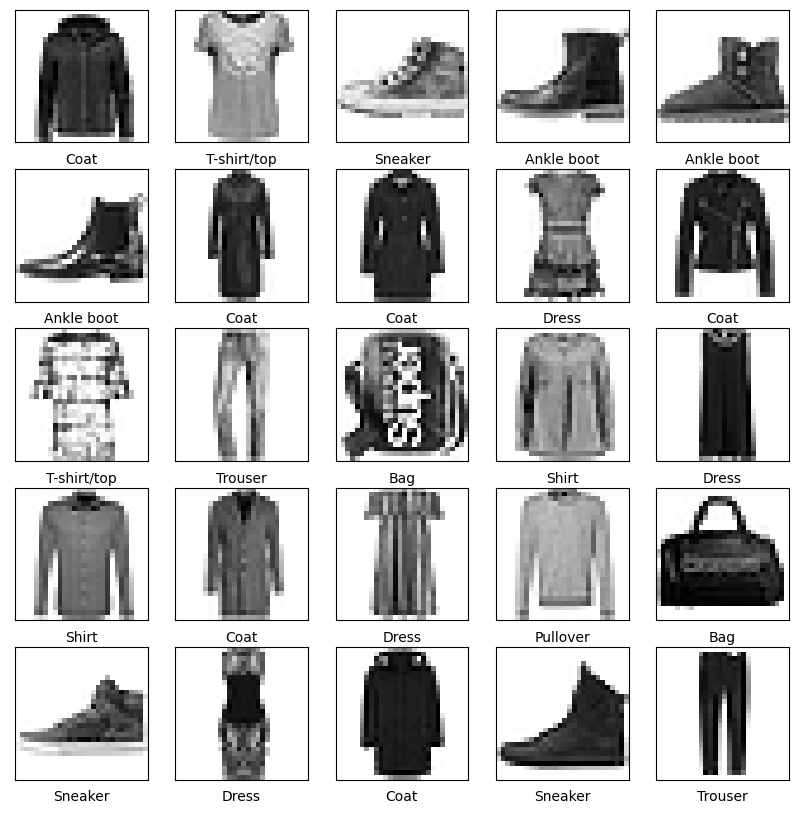

In [51]:
plot_image(X_train, y_train, class_names)

Build our classification model using keras sequential

In [52]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.layers

In [55]:
model.layers[1].name

'dense_6'

In [57]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 300), (300,))

Compile model

In [58]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Training and Evaluating model

In [59]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 27s 14ms/step - loss: 0.7188 - accuracy: 0.7640 - val_loss: 0.5561 - val_accuracy: 0.8048
Epoch 2/30
1719/1719 [==============================] - 27s 16ms/step - loss: 0.4902 - accuracy: 0.8285 - val_loss: 0.4448 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 22s 13ms/step - loss: 0.4441 - accuracy: 0.8457 - val_loss: 0.4259 - val_accuracy: 0.8510
Epoch 4/30
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4174 - accuracy: 0.8550 - val_loss: 0.4456 - val_accuracy: 0.8430
Epoch 5/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3984 - accuracy: 0.8604 - val_loss: 0.3974 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3832 - accuracy: 0.8648 - val_loss: 0.3779 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3697 - accuracy: 0.8687 - val_loss: 0.3593 - va

Plot learning curve

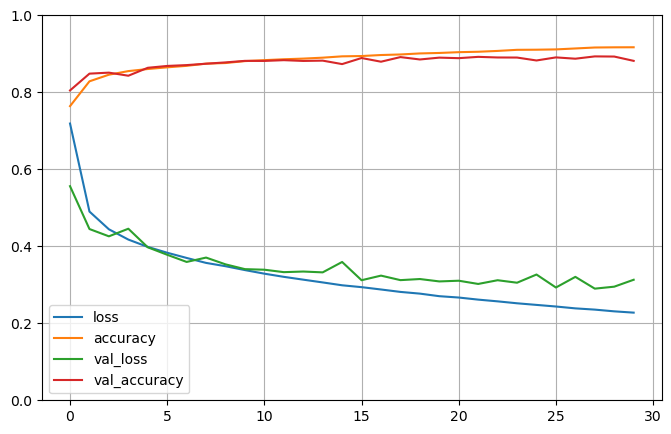

In [60]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Good! Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 56.7118 - accuracy: 0.8539


[56.711769104003906, 0.8539000153541565]

Using the model to make predictions

In [62]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 110ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
import numpy as np

y_pred = model.predict(X_new)
y_pred = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels (integer indices)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 41ms/step


Plot predictions

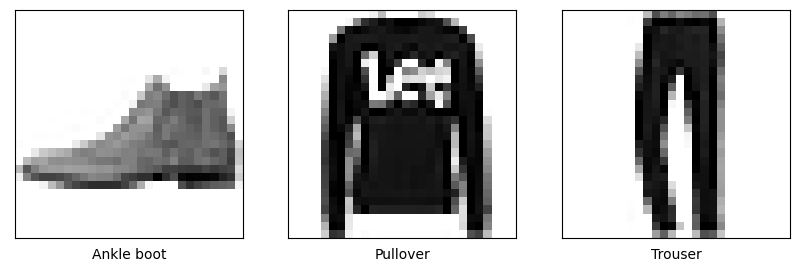

In [64]:

plot_image(X_new, y_pred,class_names)

In [ ]:
model.save('fashion_classification_model.h5')